In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 7});

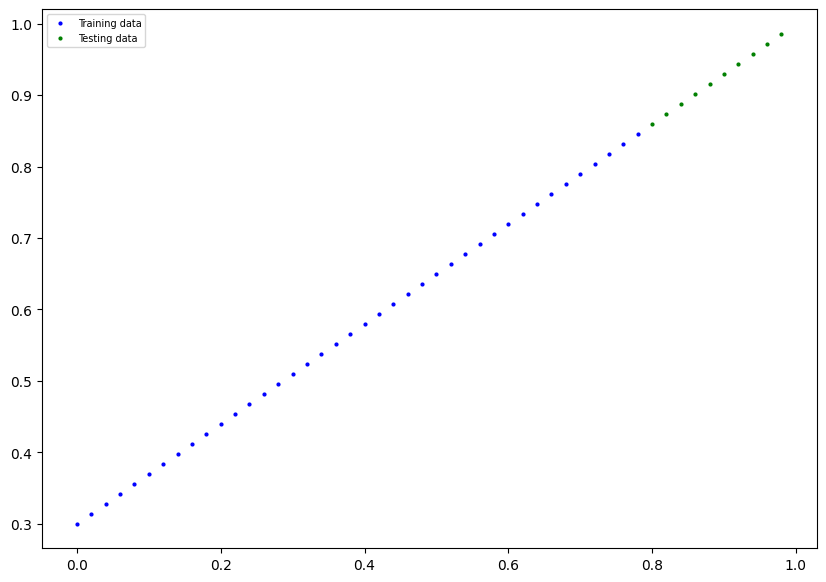

In [ ]:
plot_predictions();

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad = True,
                                          dtype = torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# torch.manual_seed(42)
torch.randn(1)

tensor([-0.8413])

In [ ]:
model = LinearRegression()
list(model.parameters())

[Parameter containing:
 tensor([0.5961], requires_grad=True),
 Parameter containing:
 tensor([0.2365], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5961])), ('bias', tensor([0.2365]))])

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

In [ ]:
with torch.no_grad():
  y_preds = model(X_test)

In [ ]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.7133],
        [0.7252],
        [0.7371],
        [0.7491],
        [0.7610],
        [0.7729],
        [0.7848],
        [0.7967],
        [0.8087],
        [0.8206]])


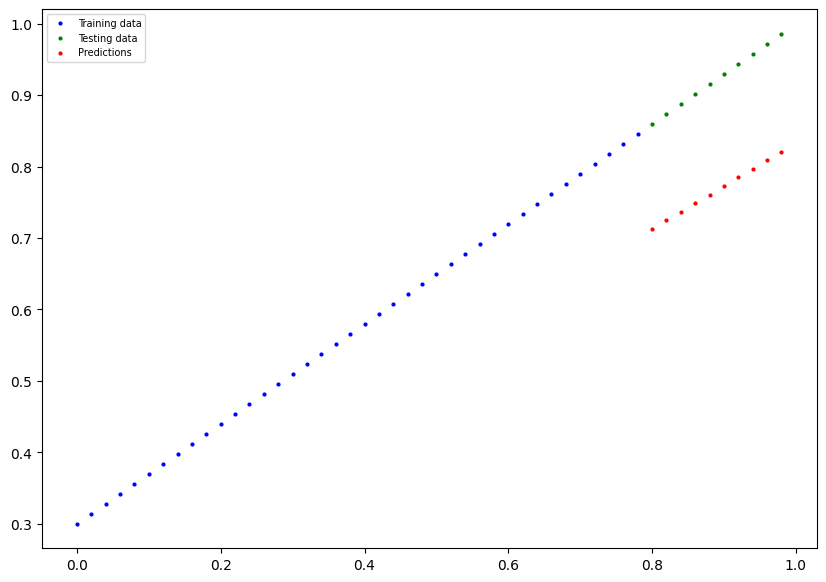

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds


tensor([[0.1467],
        [0.1488],
        [0.1509],
        [0.1529],
        [0.1550],
        [0.1571],
        [0.1592],
        [0.1613],
        [0.1633],
        [0.1654]])

In [ ]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 250

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.10408326238393784 | MAE Test Loss: 0.14258244633674622 
Epoch: 10 | MAE Train Loss: 0.013572710566222668 | MAE Test Loss: 0.033382415771484375 
Epoch: 20 | MAE Train Loss: 0.009512950666248798 | MAE Test Loss: 0.021711057052016258 
Epoch: 30 | MAE Train Loss: 0.006082161329686642 | MAE Test Loss: 0.013438517227768898 
Epoch: 40 | MAE Train Loss: 0.002643351908773184 | MAE Test Loss: 0.005165964365005493 
Epoch: 50 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 60 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 70 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 80 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 90 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 100 | MAE Train Loss: 0.0032117641530930996 | MAE Test Loss: 0.008124023675918579 
Epoch: 110 | MAE Train Loss:

In [ ]:
with torch.inference_mode():
  y_preds_new = model(X_test)

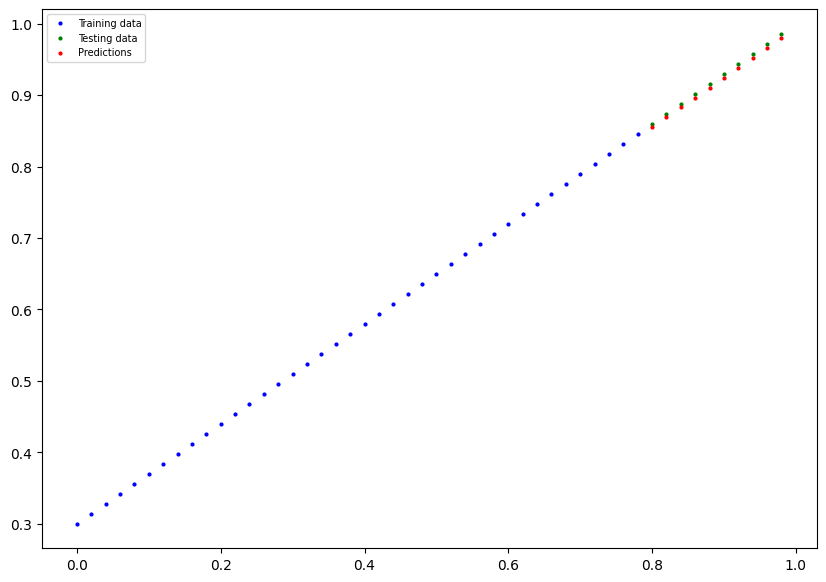

In [ ]:
plot_predictions(predictions=y_preds_new)

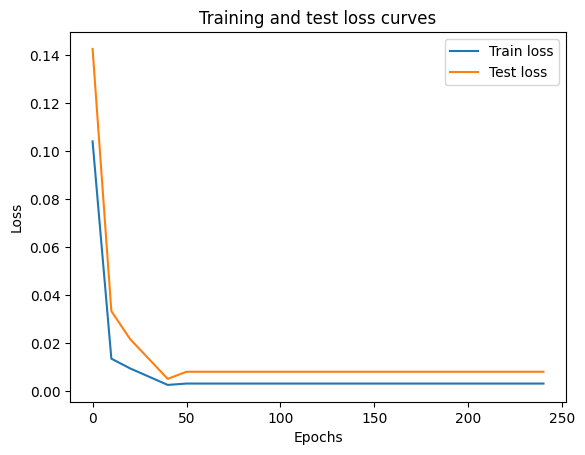

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6957])), ('bias', tensor([0.2985]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
print(model.parameters()).device

AttributeError: 'generator' object has no attribute 'device'

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
a = torch.tensor([1, 2, 3])
a

tensor([1, 2, 3])